<a href="https://colab.research.google.com/github/KPchelka/telemedycyna_projekt/blob/main/projekt_telemed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)


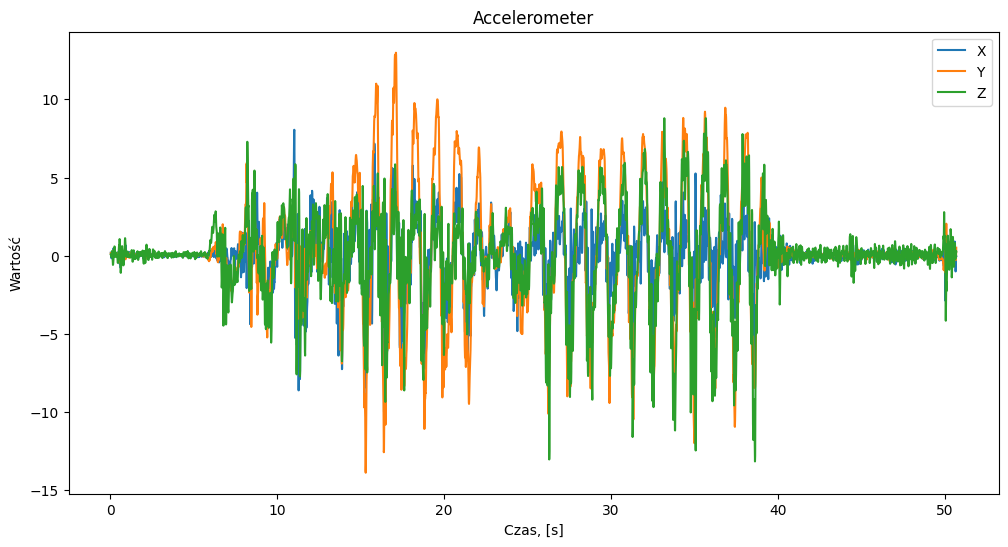

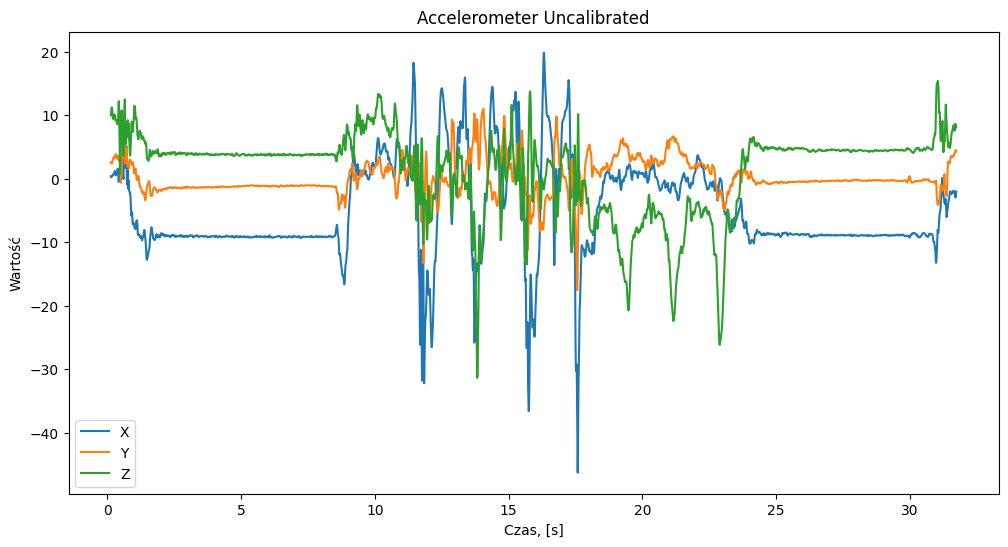

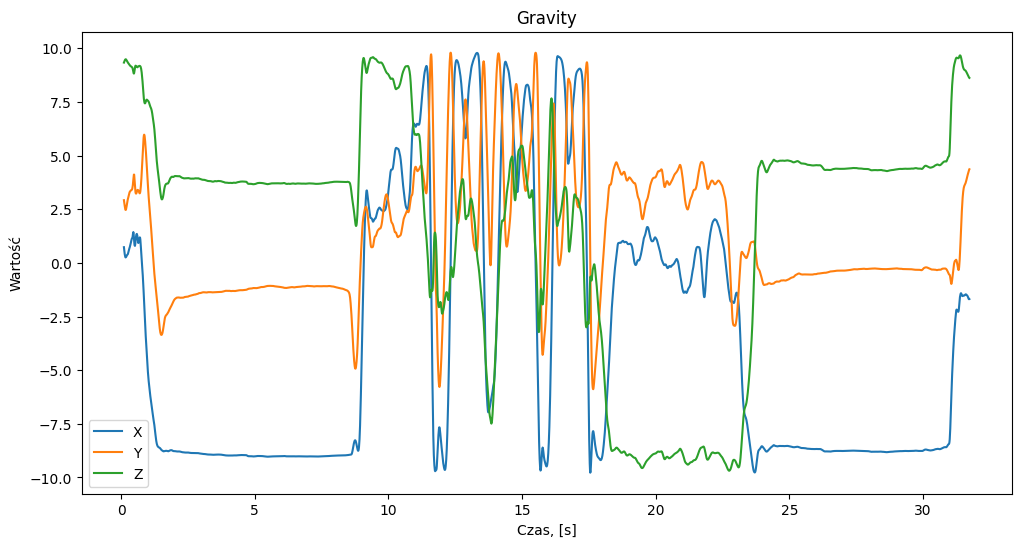

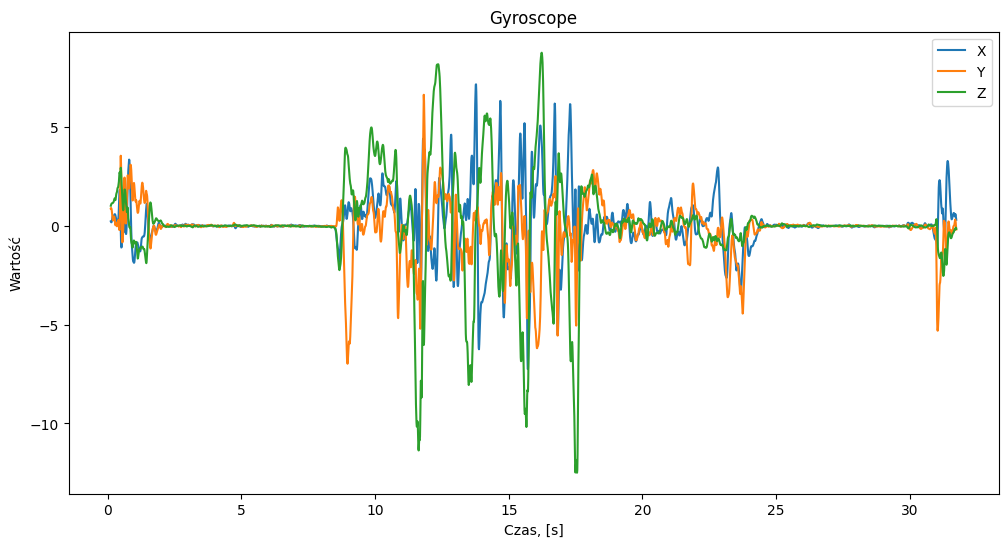

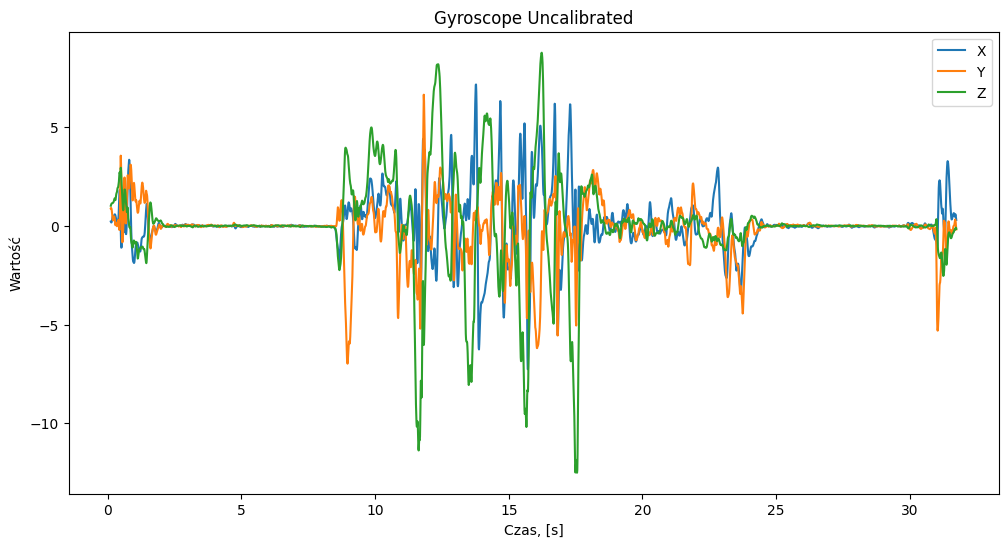

In [ ]:

import csv
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt, matplotlib.patches as mpatches, matplotlib.mlab as mlab
import json
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import scipy.stats as ss


#Import the CSV files with the daily and intraday data
accelerometer_data = pd.read_csv("dane/2024-04-23_20-51-54/Accelerometer.csv")
gravity_data = pd.read_csv('Gravity.csv')
gyroscope_data = pd.read_csv('Gyroscope.csv')
gyroscope_u_data = pd.read_csv('GyroscopeUncalibrated.csv')
metadata = pd.read_csv('Metadata.csv')
accelerometer_uncalibrated = pd.read_csv('AccelerometerUncalibrated.csv')
#total_acceleration = pd.read_csv('TotalAcceleration.csv')


accelerometer_time = accelerometer_data['time']
accelerometer_seconds_elapsed = accelerometer_data['seconds_elapsed']
accelerometer_x = accelerometer_data['x']
accelerometer_y = accelerometer_data['y']
accelerometer_z = accelerometer_data['z']

accelerometer_u_time = accelerometer_uncalibrated['time']
accelerometer_u_seconds_elapsed = accelerometer_uncalibrated['seconds_elapsed']
accelerometer_u_x = accelerometer_uncalibrated['x']
accelerometer_u_y = accelerometer_uncalibrated['y']
accelerometer_u_z = accelerometer_uncalibrated['z']

gravity_time = gravity_data['time']
gravity_seconds_elapsed = gravity_data['seconds_elapsed']
gravity_x = gravity_data['x']
gravity_y = gravity_data['y']
gravity_z = gravity_data['z']

gyroscope_time = gyroscope_data['time']
gyroscope_seconds_elapsed = gyroscope_data['seconds_elapsed']
gyroscope_x = gyroscope_data['x']
gyroscope_y = gyroscope_data['y']
gyroscope_z = gyroscope_data['z']

gyroscope_u_time = gyroscope_u_data['time']
gyroscope_u_seconds_elapsed = gyroscope_u_data['seconds_elapsed']
gyroscope_u_x = gyroscope_u_data['x']
gyroscope_u_y = gyroscope_u_data['y']
gyroscope_u_z = gyroscope_u_data['z']

#total_acceleration_time = total_acceleration['time']
#total_acceleration_seconds_elapsed = total_acceleration['seconds_elapsed']
#total_acceleration_x = total_acceleration['x']
#total_acceleration_y = total_acceleration['y']
#total_acceleration_z = total_acceleration['z']


#accelerometer
plt.figure(figsize=(12, 6))

plt.plot(accelerometer_seconds_elapsed, accelerometer_x, label='X')
plt.plot(accelerometer_seconds_elapsed, accelerometer_y, label='Y')
plt.plot(accelerometer_seconds_elapsed, accelerometer_z, label='Z')

plt.title('Accelerometer')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

#Accelerometer Uncalibrated
plt.figure(figsize=(12, 6))

plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_x, label='X')
plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_y, label='Y')
plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_z, label='Z')

plt.title('Accelerometer Uncalibrated')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

#Gravity
plt.figure(figsize=(12, 6))

plt.plot(gravity_seconds_elapsed, gravity_x, label='X')
plt.plot(gravity_seconds_elapsed, gravity_y, label='Y')
plt.plot(gravity_seconds_elapsed, gravity_z, label='Z')

plt.title('Gravity')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

#Gyroscope
plt.figure(figsize=(12, 6))

plt.plot(gyroscope_seconds_elapsed, gyroscope_x, label='X')
plt.plot(gyroscope_seconds_elapsed, gyroscope_y, label='Y')
plt.plot(gyroscope_seconds_elapsed, gyroscope_z, label='Z')

plt.title('Gyroscope')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

#Gyroscope Uncalibrated
plt.figure(figsize=(12, 6))

plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_x, label='X')
plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_y, label='Y')
plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_z, label='Z')

plt.title('Gyroscope Uncalibrated')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

#Total Acceleration
#plt.figure(figsize=(12, 6))

#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_x, label='X')
#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_y, label='Y')
#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_z, label='Z')

#plt.title('Total Acceleration')
#plt.xlabel('Czas, [s]')
#plt.ylabel('Wartość')
#plt.legend()
#plt.show()




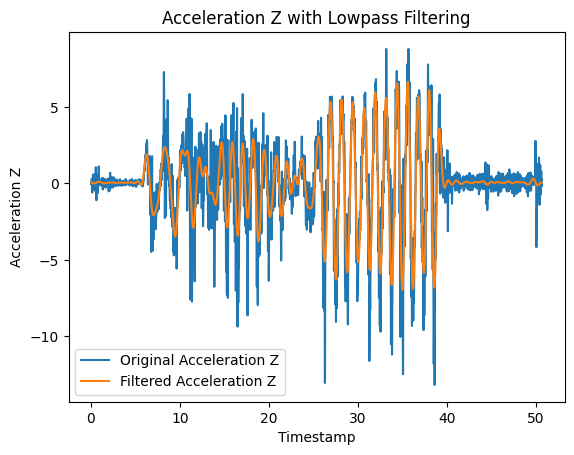

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt



# Parametry filtru dolnoprzepustowego
cutoff_frequency = 5  # częstotliwość odcięcia w Hz
sampling_rate = 100  # częstotliwość próbkowania w Hz

# Projektowanie filtru dolnoprzepustowego (filtrowanie Butterworth)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 2 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filtracja sygnału
filtered_acceleration_z = butter_lowpass_filter(accelerometer_z, cutoff_frequency, sampling_rate)

# Wyświetlenie wykresu oryginalnego sygnału i sygnału po filtracji
plt.plot(accelerometer_seconds_elapsed, accelerometer_z, label='Original Acceleration Z')
plt.plot(accelerometer_seconds_elapsed, filtered_acceleration_z, label='Filtered Acceleration Z')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration Z')
plt.title('Acceleration Z with Lowpass Filtering')
plt.legend()
plt.show()

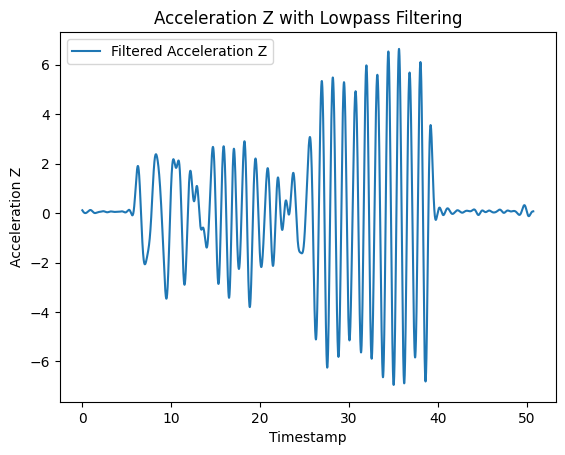

In [ ]:
plt.plot(accelerometer_seconds_elapsed, filtered_acceleration_z, label='Filtered Acceleration Z')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration Z')
plt.title('Acceleration Z with Lowpass Filtering')
plt.legend()
plt.show()

[0.11317355 0.10718527 0.1012653  ... 0.07022011 0.0707007  0.07108931]


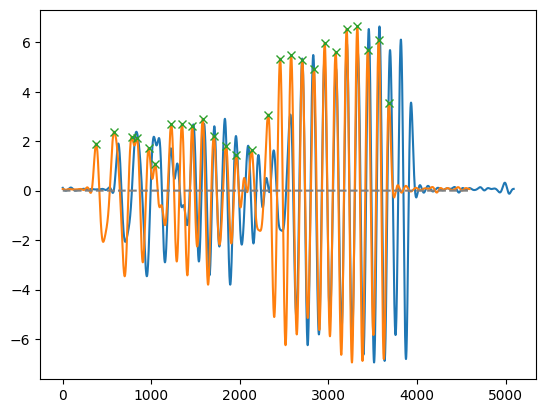

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = filtered_acceleration_z
print(x)
shiftex = x[250:-250]
peaks, _ = find_peaks(shiftex, height=1)
plt.plot(x)
plt.plot(shiftex)
plt.plot(peaks, shiftex[peaks], "x")
plt.plot(np.zeros_like(shiftex), "--", color="gray")
plt.show()

In [ ]:
for i in range(0, len(peaks)):
    print(peaks[i], x[peaks[i]])

print("Czas wykonywania ćwiczenia w sekundach: ",  accelerometer_seconds_elapsed[peaks[len(peaks)-1]] - accelerometer_seconds_elapsed[peaks[0]])

377 0.04910959912765455
581 0.11474348108981962
778 -0.1570874087596532
836 2.360805977936695
970 -2.4234398105284987
1043 2.0045438842319827
1225 1.662829478684962
1346 -0.6691801656143461
1462 2.285504012757883
1580 1.8120472524321571
1705 2.4022515358536354
1843 2.264545470580697
1959 2.1691604124318213
2132 -1.0192257079708436
2320 0.11269539456513811
2454 -1.5696809041730502
2578 2.8753443807535675
2705 5.333347080663192
2835 5.178494066214696
2957 5.252629663698662
3081 4.84038573545263
3205 5.940369687632638
3325 5.3808248068193505
3445 5.6347624561688985
3568 6.124112218895848
3682 4.472629078933504
Czas wykonywania ćwiczenia w sekundach:  32.884825683593746


In [ ]:
lower_bound = -1.5
upper_bound = 1.5

# Ustaw czas trwania, aby uznać dane jako pasujące
required_duration = 5  # sekundy

# Zainicjuj zmienną do przechowywania ostatniej wartości x i odpowiadającego czasu
last_valid_value = None
time_s_of_last_valid_value = None
time_of_last_valid_value = None

# Iteruj przez indeksy danych
for idx in range(len(accelerometer_data)):
    time_s = accelerometer_data['seconds_elapsed'].iloc[idx]
    z_value = accelerometer_data['z'].iloc[idx]
    time = accelerometer_data['time'].iloc[idx] / 10**9

    date_time = datetime.fromtimestamp(time)

    # Sprawdź, czy wartość x spełnia warunek
    if lower_bound <= z_value <= upper_bound:
        # Aktualizuj ostatnią ważną wartość x i czas
        last_valid_value = z_value
        time_s_of_last_valid_value = time_s
        time_of_last_valid_value = date_time

        # Sprawdź, czy wartość x utrzymuje się w granicach przez wymaganą liczbę sekund
        if idx >= required_duration:  # Sprawdzamy czy mamy wystarczającą ilość pomiarów
            break  # Jeśli tak, możemy przerwać iterację

# Jeśli ostatnia ważna wartość została znaleziona, wydrukuj ją wraz z odpowiadającym czasem
if last_valid_value is not None and time_s_of_last_valid_value is not None:
    poczatek_treningu = last_valid_value
    czas_s_poczatku_treningu = time_s_of_last_valid_value
    czas_poczatku_treningu = time_of_last_valid_value

    print("Znaleziono ostatnią wartość x w granicach od -1.5 do 1.5 przez co najmniej 5 sekund: ", poczatek_treningu, "s")
    print("Czas odpowiadający tej wartości:", czas_s_poczatku_treningu)
    print("Godzina rozpoczęcia treningu", czas_poczatku_treningu)
else:
    print("Nie znaleziono odpowiedniej wartości z")


Znaleziono ostatnią wartość x w granicach od -1.5 do 1.5 przez co najmniej 5 sekund:  1.029494285583496 s
Czas odpowiadający tej wartości: 0.144416015625
Godzina rozpoczęcia treningu 2024-04-15 20:22:11.396416


jezeli wartosc x nie jest wieksza od danego zakresu to nic nie robimy

jezeli wartosc jest poza oraz w srodku zakresu to jezeli te wartosci wahaja się przez wiecej niz 3 sekundy to zaczynamy pomiar - 3 sekundy  

In [ ]:
lower_bound = -1.5
upper_bound = 1.5

down = -300
up = 300

required_duration = 5

for idx in range(len(accelerometer_data)):
        z_value = accelerometer_data['z'].iloc[idx]
        accelerometer_seconds_elapsed = accelerometer_data['seconds_elapsed'].iloc[idx]

        if z_value in range(lower_bound, upper_bound) and accelerometer_seconds_elapsed == required_duration:
            print('Nie rozpoczeto treningu')

        elif lower_bound >= z_value >= upper_bound and accelerometer_seconds_elapsed >= required_duration:

            print('Rozpoczeto trening')
            break





SyntaxError: expected ':' (3143758404.py, line 16)

In [ ]:
from datetime import datetime

# Wartość timestamp w nanosekundach
timestamp = 1713205334408832500 / 10**9

# Przekształcenie timestamp na datę i czas
date_time = datetime.fromtimestamp(timestamp)

# Wyświetlenie przekształconej daty i czasu
print("Przekształcona data i czas:", date_time)

Przekształcona data i czas: 2024-04-15 20:22:14.408833


In [ ]:
# Function to get user data
def get_user_data():
    name = input("Wprowadź swoje imię: ")
    age = input(f"{name}, wprowadź swój wiek: ")
    weight = float(input(f"{name}, podaj swoją wagę (kg): "))
    height = float(input(f"{name}, podaj swój wzrost (cm): "))
    return {"name": name, "age": age, "weight": weight, "height": height,}


# Function to save user data to JSON file
def save_user_data(data):
    with open('user_data.json', 'w') as f:
        json.dump(data, f)

# Function to load user data from JSON file
def load_user_data():
    with open('user_data.json') as f:
        return json.load(f)

# Function to prompt user to log in or sign up
def login_or_signup():
    choice = input("Wybierz 1, aby zalogować się, lub 2, aby się zarejestrować: ")
    if choice == "1":
        # Log in
        while True:
            try:
                user_data = load_user_data()
            except FileNotFoundError:
                print("Brak danych użytkownika. Proszę najpierw się zarejestrować.")
                return login_or_signup()
            name = input("Wprowadź swoje imię: ")
            age = input(f"{name}, wprowadź swój wiek: ")
            if name == user_data['name'] and age == user_data['age']:
                print("Logowanie udane!")
                return user_data
            else:
                print("Logowanie nieudane. Proszę spróbować ponownie.")
    elif choice == "2":
        # Sign up
        user_data = get_user_data()
        save_user_data(user_data)
        print("Rejestracja zakończona pomyślnie!")
        return user_data
    else:
        print("Nieprawidłowy wybór. Proszę spróbować ponownie.")
        return login_or_signup()

# Get user data
user_data = login_or_signup()

# Create a function to log a workout session
def log_workout(user_data):
    # Get today's date
    date = datetime.today().strftime("%Y-%m-%d")

    # Ask the user for workout details
    exercise = input("Podaj nazwę ćwiczenia: ")
    sets = int(input("Podaj ilość podejść: "))
    reps = int(input("Podaj liczbę powtórzeń w podejściu: "))
    duration = float(input("Podaj czas trwania ćwiczenia (w minutach): "))
    calories_burned = float(input("Podaj liczbę kalorii spalonych podczas ćwiczenia: "))

    # Save the workout data to a CSV file
    with open(f"{user_data['name']}_workouts.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date, exercise, sets, reps, duration, calories_burned])

    print("Trening został zarejestrowany pomyślnie!")

# Create a function to generate monthly workout summary chart
def generate_monthly_workout_summary_chart(user_data):
    # Prompt user for the month
    month = input("Podaj miesiąc, dla którego chcesz wygenerować zestawienie treningów (format: mm-rrrr): ")

    # Create a dictionary to store monthly workout data
    monthly_data = defaultdict(float)

    # Read the workout data from the CSV file for the given month
    with open(f"{user_data['name']}_workouts.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            date = row[0]
            if date.endswith(month):
                duration = float(row[4])
                monthly_data[date[0:10]] += duration

    # Generate the workout chart
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(list(monthly_data.keys()), list(monthly_data.values()))
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Workout Duration (minutes)")
    ax.set_title(f"{month} Workout Summary")

    plt.show()


# Create a function to generate a pie chart of the most common exercises
def generate_exercise_chart(user_data):
    # Create a dictionary to store exercise data
    exercise_data = defaultdict(int)

    # Read the workout data from the CSV file
    with open(f"{user_data['name']}_workouts.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            exercise = row[1]
            exercise_data[exercise] += 1

            # Generate the chart
    labels = list(exercise_data.keys())
    values = list(exercise_data.values())
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title("Most Common Exercises")
    plt.show()


# Create a function to generate a bar chart of the total calories burned
def generate_calories_chart(user_data):
    # Prompt user for the month
    month = input("Podaj miesiąc, dla którego chcesz wygenerować zestawienie treningów (format: mm-rrrr): ")

    # Create a dictionary to store monthly calorie data
    monthly_calories = defaultdict(float)

    # Read the workout data from the CSV file
    with open(f"{user_data['name']}_workouts.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            date = row[0]
            if date.endswith(month):
                calories = float(row[5])
                monthly_calories[date[0:7]] += calories


    # Generate the chart
    x_values = list(monthly_calories.keys())
    y_values = list(monthly_calories.values())
    plt.bar(x_values, y_values)
    plt.xlabel("Month")
    plt.ylabel("Total Calories Burned")
    plt.title("Monthly Calories Burned Summary")
    plt.show()


# Main program loop
while True:
    print("\n---- Fitness Tracker ----")
    print("1. Zarejestruj trening")
    print("2. Wygeneruj miesięczny wykres podsumowujący treningi")
    print("3. Wygeneruj wykres kołowy ogólnych typowych ćwiczeń")
    print("4. Wygeneruj wykres słupkowy całkowitej liczby spalonych kalorii")
    print("5. Wyjdź")
    choice = input("Wpisz swój wybór (1-5): ")

    if choice == "1":
        user_data = load_user_data()
        log_workout(user_data)
    elif choice == "2":
        user_data = load_user_data()
        generate_monthly_workout_summary_chart(user_data)
    elif choice == "3":
        user_data = load_user_data()
        generate_exercise_chart(user_data)
    elif choice == "4":
        user_data = load_user_data()
        generate_calories_chart(user_data)
    elif choice == "5":
        print("Do widzenia!")
        break
    else:
        print("Nieprawidłowy wybór. Proszę spróbuj ponownie.")

Nieprawidłowy wybór. Proszę spróbować ponownie.
Rejestracja zakończona pomyślnie!

---- Fitness Tracker ----
1. Zarejestruj trening
2. Wygeneruj miesięczny wykres podsumowujący treningi
3. Wygeneruj wykres kołowy ogólnych typowych ćwiczeń
4. Wygeneruj wykres słupkowy całkowitej liczby spalonych kalorii
5. Wyjdź
